In [289]:
import numpy as np
import matplotlib.pyplot as plt

In [290]:
class Env:
    def reset(self):
        self.state = np.random.randint(7)
        return self.state
    
    def set_state(self, state):
        self.state = state
    
    def step(self, action):
        if action == 0:   # solid action
            self.state = 6
        else:  # dashed action
            self.state = np.random.randint(6)
        
        return self.state, 0

In [291]:
class Agent7:  # Emphatic TD - Expectation
    def __init__(self, do=False):
        self.x = np.array([[2., 0, 0, 0, 0, 0, 0, 1],
                           [0, 2, 0, 0, 0, 0, 0, 1],
                           [0, 0, 2, 0, 0, 0, 0, 1],
                           [0, 0, 0, 2, 0, 0, 0, 1],
                           [0, 0, 0, 0, 2, 0, 0, 1],
                           [0, 0, 0, 0, 0, 2, 0, 1],
                           [0, 0, 0, 0, 0, 0, 1, 2]])
        self.w = np.array([1., 1, 1, 1, 1, 1, 10, 1])

        self.v = np.zeros(8)

        self.alpha = 0.03
        self.beta = 0.05
        self.gamma = 0.80

        self.optimal_w = np.array([1., 1, 1, 1, 1, 4, -2])

        if do:
            self.do()

    def do(self):
        self.s_log = []
        self.w_log = []
        self.VE = []
        env = Env()
        M = 0
        state = env.reset()
        for iter in range(1000):

            w_delta = np.zeros(8)

            M = self.gamma * M + 1
            
            for state in range(7):
                delta = 0 + self.gamma * self.w @ self.x[6] - self.w @ self.x[state]
                w_delta += M * delta * self.x[state]

            self.w += self.alpha / 7 * w_delta

            self.VE.append(self.get_VE(self.w))
            self.s_log.append(self.x @ self.v)
            self.w_log.append(self.w.copy())
            
    def rms(self, X, Y, a):
        diff = X - a * Y
        return np.sqrt(np.mean(diff**2))
    
    def find_optimal_a(self, X, Y):
    # a에 대한 미분 후 최소화할 a를 찾기 위해 아래와 같이 계산
        a_optimal = np.dot(X, Y) / np.dot(Y, Y)
        return a_optimal

    def get_VE(self, w):
        X = self.x @ w
        Y = self.optimal_w

        a = self.find_optimal_a(X, Y)
        return self.rms(X, Y, a)

In [292]:
a7 = Agent7(do=True)

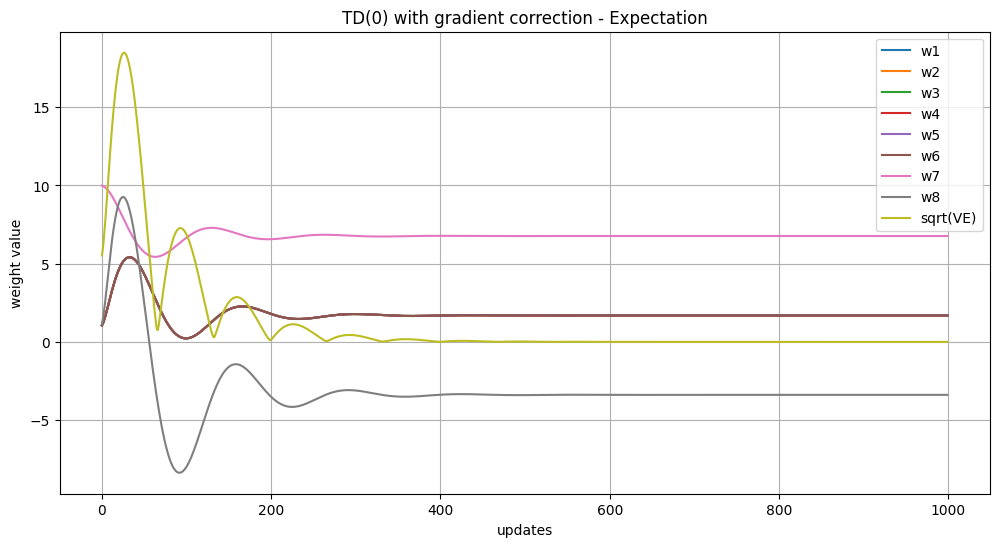

In [293]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i in range(8):
    ax.plot([w[i] for w in a7.w_log], label='w'+str(i+1))

ax.plot(a7.VE, label='sqrt(VE)')

ax.legend()
ax.set_xlabel('updates')
ax.set_ylabel('weight value')
ax.set_title('TD(0) with gradient correction - Expectation')
ax.grid()

plt.show()